**1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Wine_clust  (1).csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

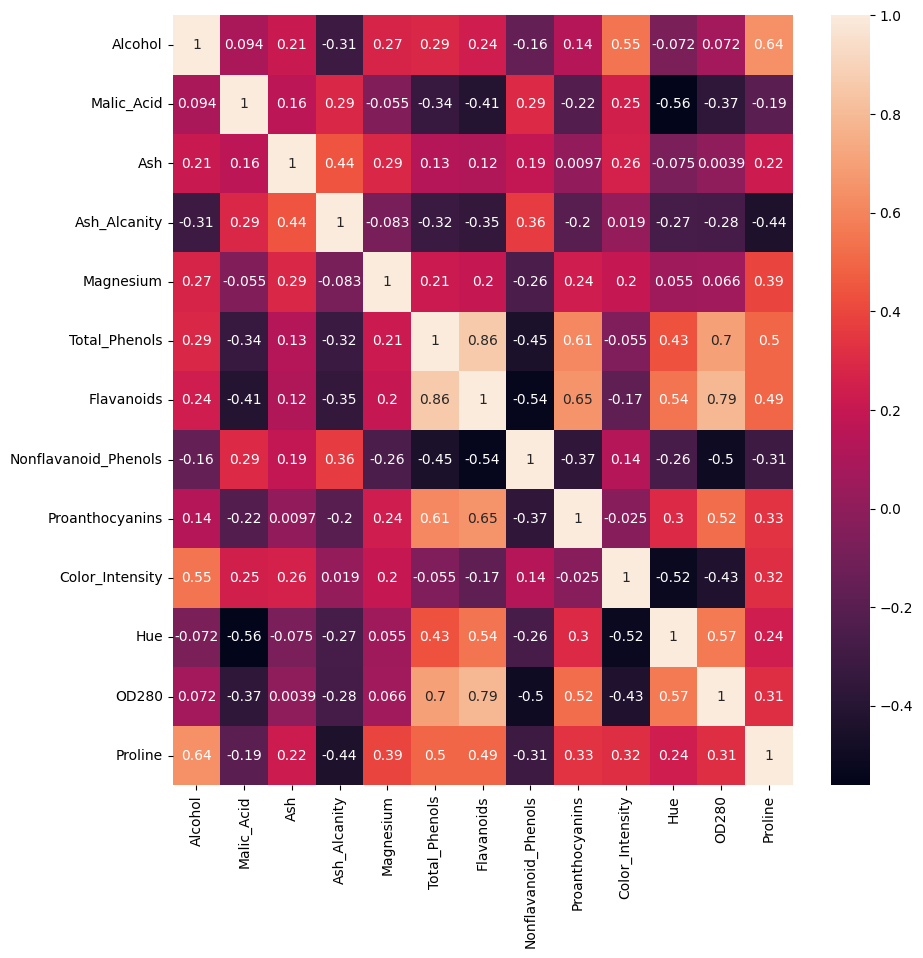

In [8]:
plt.figure(figsize =(10 ,10))
sns.heatmap(data.corr() ,annot=True)
plt.show()

In [9]:
X = data[['Alcohol','Malic_Acid']]
X.head()

,Alcohol,Malic_Acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


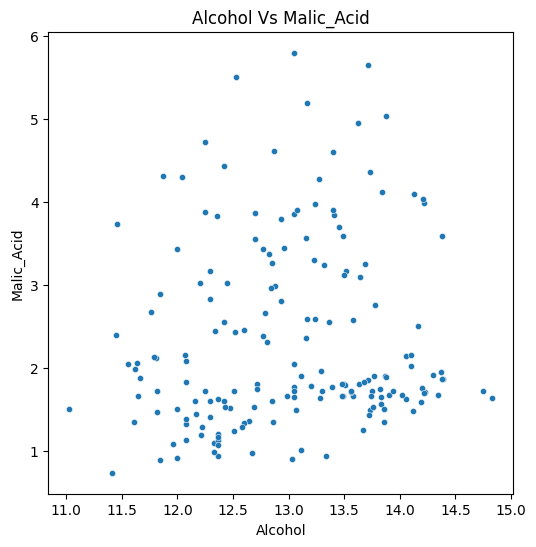

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Alcohol',y='Malic_Acid',data=X,s=20)
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.title('Alcohol Vs Malic_Acid')
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
WCSS = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                  n_init=10, random_state=42)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

WCSS


[337.55275842696636,
 168.0837419169812,
 95.55394205616608,
 72.68914691708522,
 61.388816129096554,
 51.78785605389446,
 43.24916513123895,
 36.714654196014195,
 32.3271586904762,
 28.82328239650746]

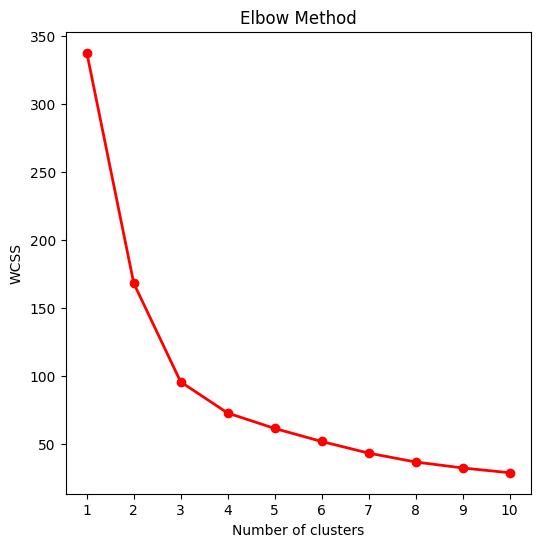

In [13]:
plt.figure(figsize=(6,6))
plt.plot(range(1,11),WCSS,linewidth=2,color='red',marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
                  n_init=10, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.predict(X)

cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1,
       2, 1], dtype=int32)

In [15]:
data1 = data.copy()

data1['Cluster'] = cluster_labels
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [16]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1,
       2, 1], dtype=int32)

In [17]:
kmeans.cluster_centers_

array([[12.21349206,  1.6531746 ],
       [13.0632    ,  3.8948    ],
       [13.71538462,  1.79969231]])

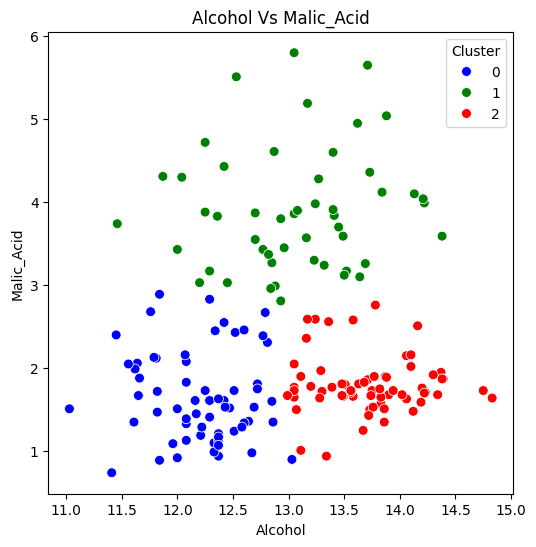

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Alcohol',y='Malic_Acid',
                data=data1,hue='Cluster', palette=['blue','green','red'],
                s=50)
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.title('Alcohol Vs Malic_Acid')
plt.show()

In [19]:
from scipy.cluster.hierarchy import linkage , dendrogram

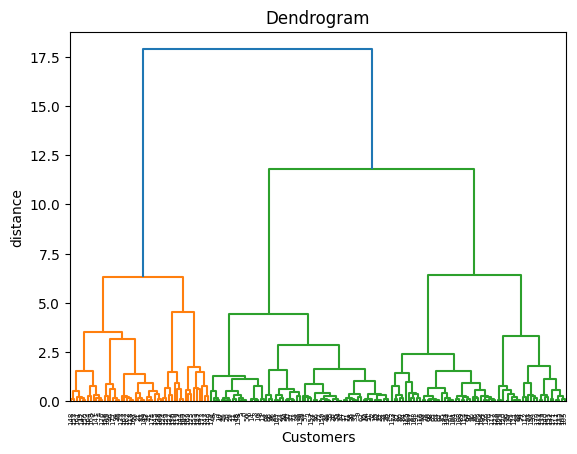

In [20]:
mergings = linkage(X, method = "ward")
dendrogram(mergings)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("distance")
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters = 3 , metric = 'euclidean' , linkage = "ward")

y_agg_hc = agg_hc.fit_predict(X)

In [22]:
y_agg_hc

array([2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1,
       1, 1])

In [23]:
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [24]:
data1['Cluster'].value_counts()

Cluster
2    65
0    63
1    50
Name: count, dtype: int64

In [25]:
data1 = data.copy()

data1['Cluster_agglo'] = y_agg_hc
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_agglo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [26]:
data1['Cluster_agglo'].value_counts()

Cluster_agglo
2    65
0    63
1    50
Name: count, dtype: int64

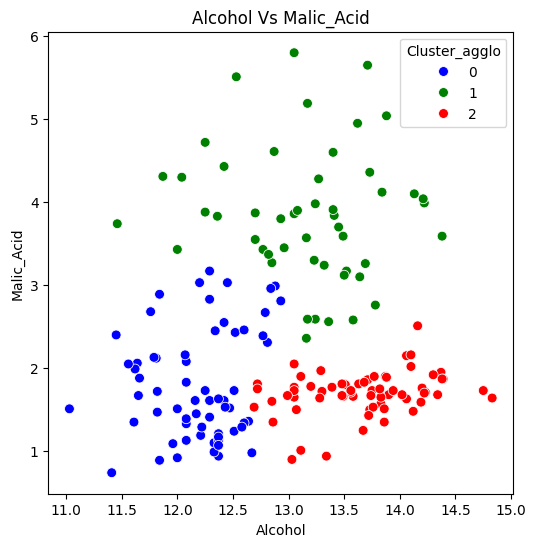

In [27]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Alcohol',y='Malic_Acid',
                data=data1,hue='Cluster_agglo', palette=['blue','green','red'],
                s=50)
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.title('Alcohol Vs Malic_Acid')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

kmeans_silh_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters = k, random_state =42, n_init = 10)
  kmeans_labels = kmeans.fit_predict(X)
  silh_avg = silhouette_score(X,kmeans_labels)
  kmeans_silh_scores.append(silh_avg)


for k,score in enumerate(kmeans_silh_scores,start = 2):
  print(f"number of clusters = {k} and silhouette score = {score}")

number of clusters = 2 and silhouette score = 0.47745578237294
number of clusters = 3 and silhouette score = 0.480535724062608
number of clusters = 4 and silhouette score = 0.45639433450218325
number of clusters = 5 and silhouette score = 0.45282425540238647
number of clusters = 6 and silhouette score = 0.4152118877731869
number of clusters = 7 and silhouette score = 0.4017996626632646
number of clusters = 8 and silhouette score = 0.37534352552957595
number of clusters = 9 and silhouette score = 0.3860235613388513
number of clusters = 10 and silhouette score = 0.3763924231725126


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)
scaled_data = pd.DataFrame(scaled_data, columns = data1.columns)

In [32]:
scaled_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_agglo
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.166100
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.166100
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-0.013251
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.166100
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-0.013251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,-0.013251
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,-0.013251
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,-0.013251
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,-0.013251


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 10)

In [34]:
print(x_pca)

[[ 3.62032992 -1.10323497 -0.03028982 ...  0.18992272  0.72582889
  -0.64128814]
 [ 2.41714771  0.21473487 -2.09654267 ... -0.828056    0.1335892
  -0.5676485 ]
 [ 2.50034279 -0.42309272  1.15005288 ... -0.15124703 -1.2757513
  -0.2249883 ]
 ...
 [-2.32921238 -2.99117171 -0.70525716 ... -0.03513887 -0.07395539
   0.32303652]
 [-2.09592798 -2.50397478 -0.36029432 ... -0.01612297  0.26983511
  -0.49060185]
 [-2.82713001 -3.11522283  1.12815517 ...  0.05091162  0.4626278
   0.52378816]]


In [38]:
pca = PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X.head()

,PCA1,PCA2
0,-0.446760,1.305411
1,-0.522680,0.275831
2,0.045887,0.154455
3,-0.189418,1.410175
4,0.284869,0.201228


In [39]:
centers=pca.transform(kmeans.cluster_centers_)
centers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-0.53966813,  0.7655312 ],
       [-0.49434823, -1.22746633],
       [ 1.67998129,  0.31804962],
       [-1.15899433, -0.62375337],
       [ 0.60488765,  0.35009541],
       [ 1.58320431, -1.08467059],
       [ 0.50401122, -0.47290296],
       [-0.76195412,  0.08869676],
       [ 2.9213188 , -0.15259358],
       [-0.31658204,  1.32503096]])

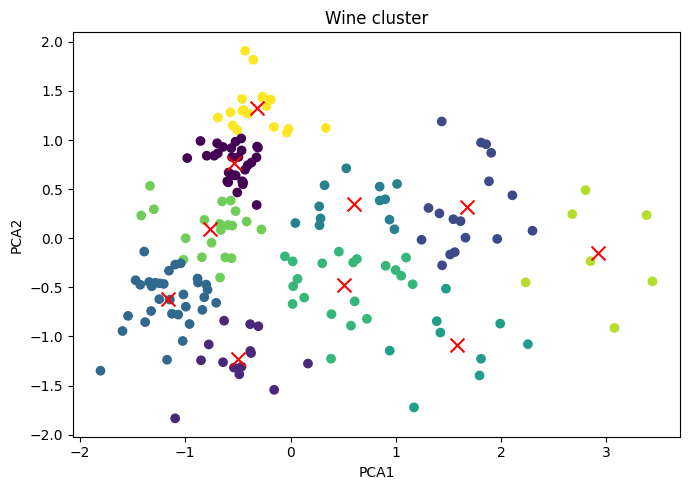

In [40]:
plt.figure(figsize=(7,5))

plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine cluster')
plt.tight_layout()

In [41]:
pca.components_

array([[ 0.14099108,  0.99001087],
       [ 0.99001087, -0.14099108]])

In [51]:
df=pd.DataFrame(data)

In [54]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [58]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=4564f1068c1f694557fe18bf10a655b1eb24702dc954a35bad38c9f93c93da78
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [59]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from sklearn.cluster import DBSCAN


In [60]:
spark = SparkSession.builder \
    .appName("DBSCAN Clustering") \
    .getOrCreate()

In [66]:
dbscan_1 = DBSCAN(eps=0.4, min_samples=5).fit(scaled_data)
dbscan_2 = DBSCAN(eps=0.5, min_samples=5).fit(scaled_data)
dbscan_3 = DBSCAN(eps=0.6, min_samples=5).fit(scaled_data)
dbscan_4 = DBSCAN(eps=0.7, min_samples=5).fit(scaled_data)

In [67]:
np.unique(dbscan_1.labels_)

array([-1])

In [68]:
np.unique(dbscan_2.labels_)

array([-1])

In [69]:
np.unique(dbscan_3.labels_)

array([-1])

In [70]:
np.unique(dbscan_4.labels_)

array([-1])

In [76]:
Alcohol = "alcohol"

In [78]:
Malic_Acid = "Malic_acid"

ValueError: 'c' argument has 178 elements, which is inconsistent with 'x' and 'y' with size 1.

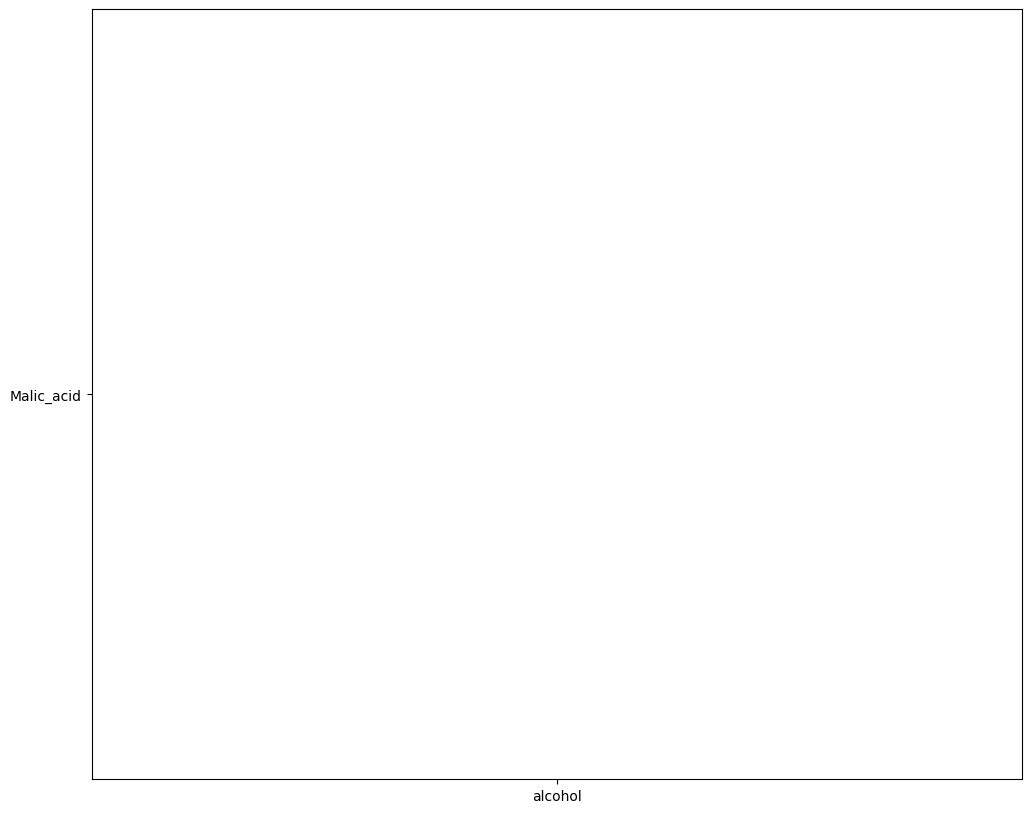

In [82]:
db_labels = np.array(dbscan_3.labels_)
plt.subplots(figsize=(12,10))
plt.scatter(Alcohol, Malic_Acid, c=db_labels)
plt.xlabel('Alcohol', fontsize=18)
plt.ylabel('Malic_Acid', fontsize=16)
plt.show()